In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_colwidth', None)

## Read data

In [6]:
false_negatives = pd.read_csv('./ensemble_false_negatives.csv')
false_positives = pd.read_csv('./ensemble_false_positives.csv')

In [8]:
false_negatives.head()

,label,id_1,id_2,text_1,text_2,deberta-v3-large_score,deberta-v3-large_pred,stsb-deberta-v3-large_score,stsb-deberta-v3-large_pred,stsb-roberta-large_score,stsb-roberta-large_pred,final_pred
0,1,1596213,1596237,"Another body was pulled from the water on Thursday and two seen floating down the river could not be retrieved due to the strong currents, local reporters said.","Two more bodies were seen floating down the river on Thursday, but could not be retrieved due to the strong currents, local reporters said.",0.001019,0,0.000606,0,0.233863,0,0
1,1,1401946,1401697,"Amgen shares gained 93 cents, or 1.45 percent, to $65.05 in afternoon trading on Nasdaq.",Shares of Allergan were up 14 cents at $78.40 in late trading on the New York Stock Exchange.,0.001990,0,0.001213,0,0.009337,0,0
2,1,1958143,1958023,"The blue-chip Dow Jones industrial average .DJI added 38 points, or 0.42 percent, to 9,165.","The Dow Jones Industrial Average [$INDU] ended at session highs, gaining 64.64 points, or 0.7 percent, to 9,191.09.",0.001158,0,0.004025,0,0.005881,0,0
3,1,813244,813532,But church members and observers say they expect that the decision could be problematic for many Episcopalians.,But church members and observers say they anticipate that the decision here could pose doctrinal problems for some Episcopalians who believe the Bible prohibits homosexuality.,0.001374,0,0.004524,0,0.012105,0,0
4,1,636412,636322,"As planned, the services will be rolled into Yukon when it ships (see story).","The reporting services will also be rolled into Yukon as planned, sources said.",0.003012,0,0.028222,0,0.001802,0,0


In [9]:
false_positives.head()

,label,id_1,id_2,text_1,text_2,deberta-v3-large_score,deberta-v3-large_pred,stsb-deberta-v3-large_score,stsb-deberta-v3-large_pred,stsb-roberta-large_score,stsb-roberta-large_pred,final_pred
0,0,749900,749726,Ballmer has been vocal in the past warning that Linux is a threat to Microsoft.,"In the memo, Ballmer reiterated the open-source threat to Microsoft.",0.999575,1,0.999488,1,0.999535,1,1
1,0,44397,44620,"Garner said the self-proclaimed mayor of Baghdad, Mohammed Mohsen al-Zubaidi, was released after two days in coalition custody.",Garner said self-proclaimed Baghdad mayor Mohammed Mohsen Zubaidi was released 48 hours after his detention in late April.,0.999706,1,0.999692,1,0.999591,1,1
2,0,2287353,2287336,"""It appears from our initial report that this was a textbook landing considering the circumstances,"" Burke said.","Said Mr. Burke: ""It was a textbook landing considering the circumstances.""",0.999734,1,0.999560,1,0.999644,1,1
3,0,2836872,2837029,"But, to the dismay of Reaganites, there is no mention of the Reagan-era economic boom.",But there is no mention of the economic recovery or the creation of wealth during his administration.,0.995793,1,0.998911,1,0.997190,1,1
4,0,1793425,1793488,"A Florida grand jury investigating pharmaceutical wholesalers indicted 19 people on charges of peddling bogus or diluted medications often prescribed for cancer and AIDS patients, authorities said yesterday.","A Florida grand jury indicted 19 people for contaminating and diluting prescription drugs desperately needed by AIDS and cancer patients in a multimillion-dollar scheme, prosecutors said Monday.",0.999713,1,0.999503,1,0.999554,1,1


# **Analyze data**

## Tokenize

In [11]:
from nltk.tokenize import word_tokenize
from string import punctuation

PUNCT = set(punctuation)
PUNCT.update(["``", '"', "''"])

def tokenize(text: str, remove_punct=False):
    # tokens = list(tokenizer(text))
    # if remove_punct == True:
    #     tokens = [t.text for t in tokens if t.text not in punctuation]

    tokens = word_tokenize(text.lower())
    if remove_punct == True:
        tokens = [t for t in tokens if t not in PUNCT]
    return tokens

In [13]:
false_positives['tokens_1'] = false_positives['text_1'].apply(tokenize)
false_positives['tokens_2'] = false_positives['text_2'].apply(tokenize)

false_positives['words_1'] = false_positives['text_1'].apply(lambda x: tokenize(x, remove_punct=True))
false_positives['words_2'] = false_positives['text_2'].apply(lambda x: tokenize(x, remove_punct=True))

false_positives[['label', 'text_1', 'text_2', 'tokens_1', 'tokens_2', 'words_1', 'words_2']].head()

,label,text_1,text_2,tokens_1,tokens_2,words_1,words_2
0,0,Ballmer has been vocal in the past warning that Linux is a threat to Microsoft.,"In the memo, Ballmer reiterated the open-source threat to Microsoft.","[ballmer, has, been, vocal, in, the, past, warning, that, linux, is, a, threat, to, microsoft, .]","[in, the, memo, ,, ballmer, reiterated, the, open-source, threat, to, microsoft, .]","[ballmer, has, been, vocal, in, the, past, warning, that, linux, is, a, threat, to, microsoft]","[in, the, memo, ballmer, reiterated, the, open-source, threat, to, microsoft]"
1,0,"Garner said the self-proclaimed mayor of Baghdad, Mohammed Mohsen al-Zubaidi, was released after two days in coalition custody.",Garner said self-proclaimed Baghdad mayor Mohammed Mohsen Zubaidi was released 48 hours after his detention in late April.,"[garner, said, the, self-proclaimed, mayor, of, baghdad, ,, mohammed, mohsen, al-zubaidi, ,, was, released, after, two, days, in, coalition, custody, .]","[garner, said, self-proclaimed, baghdad, mayor, mohammed, mohsen, zubaidi, was, released, 48, hours, after, his, detention, in, late, april, .]","[garner, said, the, self-proclaimed, mayor, of, baghdad, mohammed, mohsen, al-zubaidi, was, released, after, two, days, in, coalition, custody]","[garner, said, self-proclaimed, baghdad, mayor, mohammed, mohsen, zubaidi, was, released, 48, hours, after, his, detention, in, late, april]"
2,0,"""It appears from our initial report that this was a textbook landing considering the circumstances,"" Burke said.","Said Mr. Burke: ""It was a textbook landing considering the circumstances.""","[``, it, appears, from, our, initial, report, that, this, was, a, textbook, landing, considering, the, circumstances, ,, '', burke, said, .]","[said, mr., burke, :, ``, it, was, a, textbook, landing, considering, the, circumstances, ., '']","[it, appears, from, our, initial, report, that, this, was, a, textbook, landing, considering, the, circumstances, burke, said]","[said, mr., burke, it, was, a, textbook, landing, considering, the, circumstances]"
3,0,"But, to the dismay of Reaganites, there is no mention of the Reagan-era economic boom.",But there is no mention of the economic recovery or the creation of wealth during his administration.,"[but, ,, to, the, dismay, of, reaganites, ,, there, is, no, mention, of, the, reagan-era, economic, boom, .]","[but, there, is, no, mention, of, the, economic, recovery, or, the, creation, of, wealth, during, his, administration, .]","[but, to, the, dismay, of, reaganites, there, is, no, mention, of, the, reagan-era, economic, boom]","[but, there, is, no, mention, of, the, economic, recovery, or, the, creation, of, wealth, during, his, administration]"
4,0,"A Florida grand jury investigating pharmaceutical wholesalers indicted 19 people on charges of peddling bogus or diluted medications often prescribed for cancer and AIDS patients, authorities said yesterday.","A Florida grand jury indicted 19 people for contaminating and diluting prescription drugs desperately needed by AIDS and cancer patients in a multimillion-dollar scheme, prosecutors said Monday.","[a, florida, grand, jury, investigating, pharmaceutical, wholesalers, indicted, 19, people, on, charges, of, peddling, bogus, or, diluted, medications, often, prescribed, for, cancer, and, aids, patients, ,, authorities, said, yesterday, .]","[a, florida, grand, jury, indicted, 19, people, for, contaminating, and, diluting, prescription, drugs, desperately, needed, by, aids, and, cancer, patients, in, a, multimillion-dollar, scheme, ,, prosecutors, said, monday, .]","[a, florida, grand, jury, investigating, pharmaceutical, wholesalers, indicted, 19, people, on, charges, of, peddling, bogus, or, diluted, medications, often, prescribed, for, cancer, and, aids, patients, authorities, said, yesterday]","[a, florida, grand, jury, indicted, 19, people, for, contaminating, and, diluting, prescription, drugs, desperately, needed, by, aids, and, cancer, pa

In [14]:
false_negatives['tokens_1'] = false_negatives['text_1'].apply(tokenize)
false_negatives['tokens_2'] = false_negatives['text_2'].apply(tokenize)

false_negatives['words_1'] = false_negatives['text_1'].apply(lambda x: tokenize(x, remove_punct=True))
false_negatives['words_2'] = false_negatives['text_2'].apply(lambda x: tokenize(x, remove_punct=True))

false_negatives[['label', 'text_1', 'text_2', 'tokens_1', 'tokens_2', 'words_1', 'words_2']].head()

,label,text_1,text_2,tokens_1,tokens_2,words_1,words_2
0,1,"Another body was pulled from the water on Thursday and two seen floating down the river could not be retrieved due to the strong currents, local reporters said.","Two more bodies were seen floating down the river on Thursday, but could not be retrieved due to the strong currents, local reporters said.","[another, body, was, pulled, from, the, water, on, thursday, and, two, seen, floating, down, the, river, could, not, be, retrieved, due, to, the, strong, currents, ,, local, reporters, said, .]","[two, more, bodies, were, seen, floating, down, the, river, on, thursday, ,, but, could, not, be, retrieved, due, to, the, strong, currents, ,, local, reporters, said, .]","[another, body, was, pulled, from, the, water, on, thursday, and, two, seen, floating, down, the, river, could, not, be, retrieved, due, to, the, strong, currents, local, reporters, said]","[two, more, bodies, were, seen, floating, down, the, river, on, thursday, but, could, not, be, retrieved, due, to, the, strong, currents, local, reporters, said]"
1,1,"Amgen shares gained 93 cents, or 1.45 percent, to $65.05 in afternoon trading on Nasdaq.",Shares of Allergan were up 14 cents at $78.40 in late trading on the New York Stock Exchange.,"[amgen, shares, gained, 93, cents, ,, or, 1.45, percent, ,, to, $, 65.05, in, afternoon, trading, on, nasdaq, .]","[shares, of, allergan, were, up, 14, cents, at, $, 78.40, in, late, trading, on, the, new, york, stock, exchange, .]","[amgen, shares, gained, 93, cents, or, 1.45, percent, to, 65.05, in, afternoon, trading, on, nasdaq]","[shares, of, allergan, were, up, 14, cents, at, 78.40, in, late, trading, on, the, new, york, stock, exchange]"
2,1,"The blue-chip Dow Jones industrial average .DJI added 38 points, or 0.42 percent, to 9,165.","The Dow Jones Industrial Average [$INDU] ended at session highs, gaining 64.64 points, or 0.7 percent, to 9,191.09.","[the, blue-chip, dow, jones, industrial, average, .dji, added, 38, points, ,, or, 0.42, percent, ,, to, 9,165, .]","[the, dow, jones, industrial, average, [, $, indu, ], ended, at, session, highs, ,, gaining, 64.64, points, ,, or, 0.7, percent, ,, to, 9,191.09, .]","[the, blue-chip, dow, jones, industrial, average, .dji, added, 38, points, or, 0.42, percent, to, 9,165]","[the, dow, jones, industrial, average, indu, ended, at, session, highs, gaining, 64.64, points, or, 0.7, percent, to, 9,191.09]"
3,1,But church members and observers say they expect that the decision could be problematic for many Episcopalians.,But church members and observers say they anticipate that the decision here could pose doctrinal problems for some Episcopalians who believe the Bible prohibits homosexuality.,"[but, church, members, and, observers, say, they, expect, that, the, decision, could, be, problematic, for, many, episcopalians, .]","[but, church, members, and, observers, say, they, anticipate, that, the, decision, here, could, pose, doctrinal, problems, for, some, episcopalians, who, believe, the, bible, prohibits, homosexuality, .]","[but, church, members, and, observers, say, they, expect, that, the, decision, could, be, problematic, for, many, episcopalians]","[but, church, members, and, observers, say, they, anticipate, that, the, decision, here, could, pose, doctrinal, problems, for, some, episcopalians, who, believe, the, bible, prohibits, homosexuality]"
4,1,"As planned, the services will be rolled into Yukon when it ships (see story).","The reporting services will also be rolled into Yukon as planned, sources said.","[as, planned, ,, the, services, will, be, rolled, into, yukon, when, it, ships, (, see, story, ), .]","[the, reporting, services, will, also, be, rolled, into, yukon, as, planned, ,, sources, said, .]","[as, planned, the, services, will, be, rolled, into, yukon, when, it, ships, see, story]","[the, reporting, services, will, also, be, rolled, into, yukon, as, planned, sources, said]"


### Overlapping

In [15]:
def overlap_percentage(sent1: list, sent2: list):
    return len(set(sent1).intersection(set(sent2))) / len(set(sent1).union(set(sent2)))

overlap_percentage(['a', 'b', 'c', 'e'], ['a', 'b', 'c', 'd'])

0.6

In [35]:
test_df = pd.read_csv('../../data/csv/test.csv')
test_df['tokens_1'] = test_df['text_1'].apply(tokenize)
test_df['tokens_2'] = test_df['text_2'].apply(tokenize)

test_df['words_1'] = test_df['text_1'].apply(lambda x: tokenize(x, remove_punct=True))
test_df['words_2'] = test_df['text_2'].apply(lambda x: tokenize(x, remove_punct=True))

test_df['words_overlap'] = test_df.apply(lambda x: overlap_percentage(x['words_1'], x['words_2']), axis=1)
test_df['tokens_overlap'] = test_df.apply(lambda x: overlap_percentage(x['tokens_1'], x['tokens_2']), axis=1)

test_df['words_overlap'].groupby(test_df['label']).describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,578.0,0.412836,0.135039,0.130435,0.310884,0.391304,0.500000,0.9
1,1147.0,0.558464,0.154342,0.173913,0.433333,0.565217,0.666667,1.0


In [22]:
false_positives['tokens_overlap'] = false_positives.apply(lambda x: overlap_percentage(x['tokens_1'], x['tokens_2']), axis=1)
false_positives['words_overlap'] = false_positives.apply(lambda x: overlap_percentage(x['words_1'], x['words_2']), axis=1)

false_positives[['label', 'text_1', 'text_2', 'words_overlap']].sort_values(by='words_overlap', ascending=False).head(5)

,label,text_1,text_2,words_overlap
44,0,"Air Canada, the largest airline in Canada and No. 11 in the world, has been under court protection from creditors since April 1.","The No. 11 airline in the world, Air Canada has been under court protection from creditors since April 1.",0.900000
24,0,"Aventis, based in Strasbourg, France, is one of a handful of companies that still make the flu vaccine.","Aventis, based in Strasbourg, France, is one of the leading producers of the vaccine and one of a handful of companies that still make it.",0.761905
28,0,"Police believe Wilson shot Reynolds, then her mother once in the head before fatally turning the gun on herself.",Police believe Wilson then shot Jennie Mae Robinson once in the head before turning the gun on herself.,0.666667
14,0,"Critics say the law violates civil liberties, something House Judiciary Committee Chairman James Sensenbrenner, R-Wis., says he is sensitive to.","House Judiciary Committee Chairman James Sensenbrenner, R-Wis., says he is sensitive to civil liberties complaints.",0.666667
33,0,"The highest-paid Washington private-college president is Susan Resneck Pierce, who heads the University of Puget Sound.","The highest-paid private-college president in Washington is University of Puget Sound President Susan Resneck Pierce at $314,160, the Chronicle said.",0.650000


In [30]:
print(false_positives['words_overlap'].describe())

count    50.000000
mean      0.458302
std       0.145370
min       0.210526
25%       0.358766
50%       0.422619
75%       0.553763
max       0.900000
Name: words_overlap, dtype: float64


In [24]:
false_negatives['tokens_overlap'] = false_negatives.apply(lambda x: overlap_percentage(x['tokens_1'], x['tokens_2']), axis=1)
false_negatives['words_overlap'] = false_negatives.apply(lambda x: overlap_percentage(x['words_1'], x['words_2']), axis=1)

false_negatives[['label', 'text_1', 'text_2', 'words_overlap']].sort_values(by='words_overlap').head(5)

,label,text_1,text_2,words_overlap
1,1,"Amgen shares gained 93 cents, or 1.45 percent, to $65.05 in afternoon trading on Nasdaq.",Shares of Allergan were up 14 cents at $78.40 in late trading on the New York Stock Exchange.,0.178571
31,1,"The council includes 13 Shiites, five Kurds, five Sunnis, one Christian and one Turkoman.","There are five ethnic Kurds, five Sunni Muslims, a Christian and a Turkoman.",0.277778
27,1,Kodak expects earnings of 5 cents to 25 cents a share in the quarter.,Analysts surveyed by Thomson First Call had expected Kodak to earn 68 cents a share for the quarter.,0.291667
13,1,An injured woman co-worker also was hospitalized and was listed in good condition.,"A woman was listed in good condition at Memorial's HealthPark campus, he said.",0.300000
12,1,"""We've become like total strangers,"" Klein quotes him as saying.","""We've become like total strangers,"" John told a pal two days before his death.",0.300000


In [31]:
print(false_negatives['words_overlap'].describe())

count    33.000000
mean      0.483660
std       0.145838
min       0.178571
25%       0.375000
50%       0.476190
75%       0.633333
max       0.800000
Name: words_overlap, dtype: float64


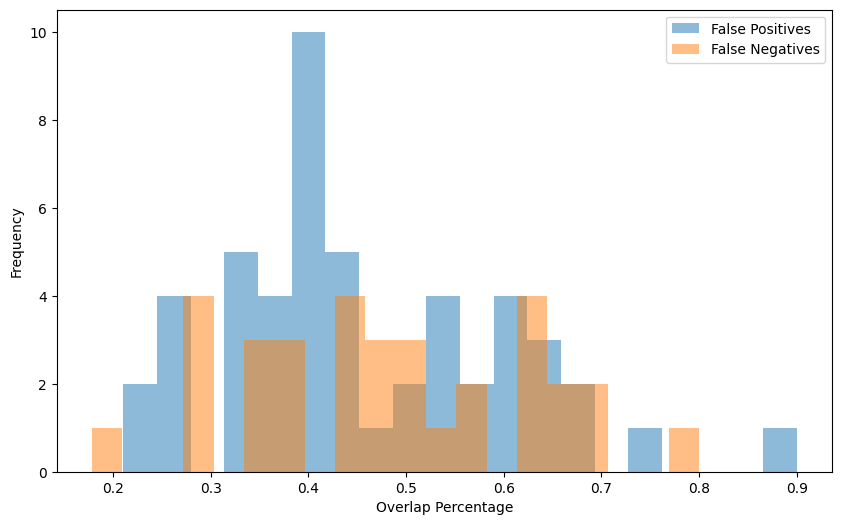

In [42]:
# plot the histogram of the overlap percentage for all test set, false positives, and false negatives on the same plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.hist(false_positives['words_overlap'], bins=20, alpha=0.5, label='False Positives')
plt.hist(false_negatives['words_overlap'], bins=20, alpha=0.5, label='False Negatives')
plt.legend(loc='upper right')
plt.xlabel('Overlap Percentage')
plt.ylabel('Frequency')
plt.show()